<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Optymalizacja-hiperparametrów" data-toc-modified-id="Optymalizacja-hiperparametrów-1">Optymalizacja hiperparametrów</a></span><ul class="toc-item"><li><span><a href="#GridSearchCV" data-toc-modified-id="GridSearchCV-1.1">GridSearchCV</a></span></li><li><span><a href="#RandomizedSearchCV" data-toc-modified-id="RandomizedSearchCV-1.2">RandomizedSearchCV</a></span></li><li><span><a href="#Zadanie" data-toc-modified-id="Zadanie-1.3">Zadanie</a></span></li></ul></li></ul></div>

In [1]:
import numpy as np
import pandas as pd

from sklearn.datasets import load_digits

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV #https://scikit-learn.org/stable/auto_examples/model_selection/plot_randomized_search.html
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import f1_score, accuracy_score, make_scorer

In [2]:
# Dane digits
digits = load_digits()
X, y = digits.data, digits.target

In [3]:
#https://scikit-learn.org/stable/modules/cross_validation.html

from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=0)

cross_val_score(clf, X, y, cv=10).mean()

0.8241247672253259

In [6]:
clf2 = RandomForestClassifier(random_state=0)

cross_val_score(clf2, X, y, cv=10).mean()

0.9476939788950961

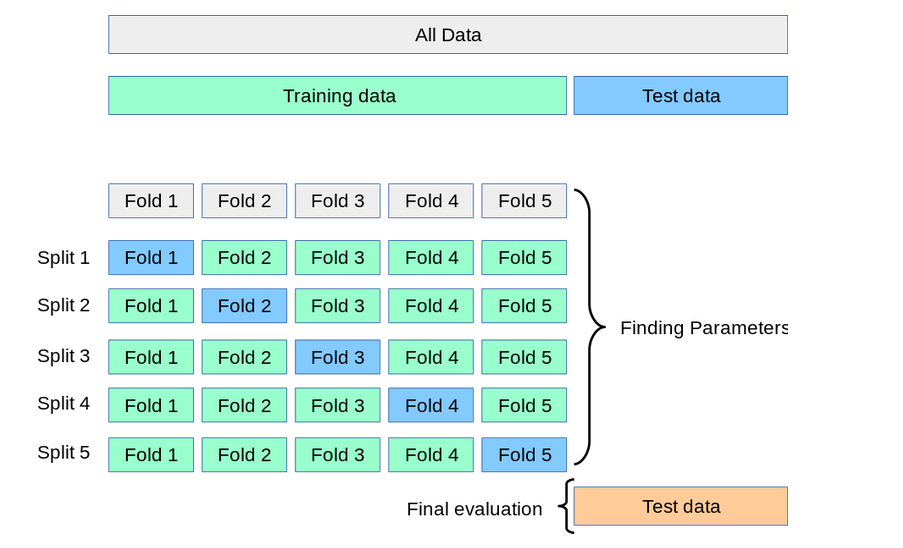

# Optymalizacja hiperparametrów

## GridSearchCV

Dokumentacja: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

W metodzie GridSearchCV otrzymamy wyniki z cross walidacji dla wszystkich kombinacji jakie podamy w słowniku parametrów. Metodę tą możemy zasosować dla wszystkich modeli biblioteki sklearn.

In [7]:
param_grid = {"max_depth": [3, None],
              "max_features": list(range(1,10))
             }
print(param_grid)

{'max_depth': [3, None], 'max_features': [1, 2, 3, 4, 5, 6, 7, 8, 9]}


In [9]:
rf_classifier = RandomForestClassifier(random_state=1)

grid_search = GridSearchCV(rf_classifier, param_grid=param_grid, cv=5, verbose=1)
grid_search.fit(X, y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1),
             param_grid={'max_depth': [3, None],
                         'max_features': [1, 2, 3, 4, 5, 6, 7, 8, 9]},
             verbose=1)

cv_results_ Zawiera wyniki dla wszystkich kombinacji parametrów z każdej próbki walidacyjnej oraz zagregowane statystyki.

In [10]:
grid_search.cv_results_

{'mean_fit_time': array([0.55800781, 0.55969887, 0.53776679, 0.64849372, 0.41129045,
        0.57902145, 0.47055526, 0.58047552, 0.51870098, 0.46490774,
        0.54283023, 0.61534491, 0.58387408, 0.59997001, 0.6912848 ,
        0.72527809, 0.74073715, 1.2061851 ]),
 'std_fit_time': array([0.1336966 , 0.17411501, 0.0912892 , 0.15279081, 0.04982091,
        0.17199554, 0.05720889, 0.16566796, 0.14768044, 0.03427254,
        0.10567077, 0.06876971, 0.0299206 , 0.02726564, 0.05748336,
        0.0548421 , 0.07392698, 0.42961027]),
 'mean_score_time': array([0.05373726, 0.0410048 , 0.05533223, 0.04266748, 0.0325336 ,
        0.04066267, 0.03964896, 0.04079509, 0.02947793, 0.03702474,
        0.03974748, 0.04476266, 0.03364625, 0.03436508, 0.03664036,
        0.0369442 , 0.0387589 , 0.06548033]),
 'std_score_time': array([0.01290659, 0.00931095, 0.03412158, 0.00980797, 0.01125977,
        0.01378583, 0.02533932, 0.01244944, 0.00231817, 0.00188353,
        0.0054434 , 0.01437065, 0.00154543, 

In [16]:
grid_search.best_estimator_

RandomForestClassifier(max_features=4, random_state=1)

In [11]:
best_param_no = grid_search.best_index_ 

In [12]:
best_param_no

12

In [13]:
grid_search.best_params_

{'max_depth': None, 'max_features': 4}

In [14]:
grid_search.best_score_

0.9432667904673476

In [15]:
print('Best params set:', grid_search.best_params_, '(no. {0})'.format(best_param_no))
print('Best params score:', grid_search.best_score_ )

Best params set: {'max_depth': None, 'max_features': 4} (no. 12)
Best params score: 0.9432667904673476


## RandomizedSearchCV

Dokumentacja: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html

Podobną metodą zajdowania parametrów jest RandomizedSearchCV. W tym przypadku w przeciwieństwie do GridSearchCV nie będziemy budować modeli dla wszytkich możliwych kombinacji a dla losowo wybranych. W ten sposób może nie znajdziemy tego możliwie najlepszego zestawu ale w dużo krótszym czasie zbliżymy się do niego, dzięki czemu będziemy mogli zawęzić poszukiwania.

In [17]:
def grid_combination(grid):
    total_params = 1 
    for par in grid:
        total_params  = total_params * len(grid[par])
    return total_params

In [18]:
param_grid = {"max_depth": [3, None],
              "max_features": list(range(1,6)),
              "n_estimators": [10, 50, 100, 200],
              "min_samples_leaf": [1, 3, 5]}

print(param_grid)
print(f'Liczba wszystkich kombinacji: {grid_combination(param_grid)}')

{'max_depth': [3, None], 'max_features': [1, 2, 3, 4, 5], 'n_estimators': [10, 50, 100, 200], 'min_samples_leaf': [1, 3, 5]}
Liczba wszystkich kombinacji: 120


Score używany w metodach RandomizedSearchCV, GridSearchCV to standardowa miara jakości dla danego modelu sklearn. Przkładowo w przypadku Random Forest jest to accuracy ale możemy podać inną funkcję metryki. Można skorzystać z wszystkich z pakietu sklearn.metris i obiektu make_scorer, który z miary robi odpowiedni scorer.

In [19]:
from sklearn.metrics import SCORERS

SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

In [25]:
random_search = RandomizedSearchCV(rf_classifier,
                                   param_distributions=param_grid,
                                   cv=5,
                                   n_iter=20, #ilosc param settings ktore sprawdzi
                                   verbose=1, 
                                   scoring='accuracy',
                                   #scoring='roc_auc', #multiclass format is not supported - miara dla klasyfikacji dla 2 klas
                                   #scoring=make_scorer(f1_score , average='macro'),
                                   random_state=99)
random_search.fit(X, y)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1),
                   n_iter=20,
                   param_distributions={'max_depth': [3, None],
                                        'max_features': [1, 2, 3, 4, 5],
                                        'min_samples_leaf': [1, 3, 5],
                                        'n_estimators': [10, 50, 100, 200]},
                   random_state=99, scoring='accuracy', verbose=1)

In [26]:
random_search.cv_results_

{'mean_fit_time': array([0.5058949 , 0.37150869, 0.20757294, 0.05066481, 0.04719949,
        0.97873406, 0.63545618, 0.03397346, 1.15492549, 0.50928054,
        0.02960191, 0.27281623, 0.21088963, 0.30990901, 0.21370959,
        0.2375041 , 0.54305844, 0.03470535, 0.7426836 , 0.72834134]),
 'std_fit_time': array([0.06059968, 0.09442866, 0.01821801, 0.00878711, 0.0026654 ,
        0.13480643, 0.0198947 , 0.00142469, 0.02140053, 0.02828153,
        0.00195189, 0.0068556 , 0.0174363 , 0.01750911, 0.02679034,
        0.02141668, 0.02210314, 0.00364647, 0.01603801, 0.02937946]),
 'mean_score_time': array([0.03600335, 0.03291588, 0.02220764, 0.00558095, 0.00524964,
        0.06836834, 0.05794201, 0.00436788, 0.06309032, 0.04126973,
        0.00377512, 0.01711836, 0.01808438, 0.02918773, 0.0170939 ,
        0.01888323, 0.03552952, 0.00417838, 0.06696539, 0.0570879 ]),
 'std_score_time': array([0.00354168, 0.0059253 , 0.00690077, 0.00120006, 0.00073759,
        0.00397011, 0.00472192, 0.000488

In [27]:
random_search.best_params_

{'n_estimators': 200,
 'min_samples_leaf': 1,
 'max_features': 5,
 'max_depth': None}

In [28]:
random_search.best_score_

0.9421432992881462

In [30]:
ranks = random_search.cv_results_['rank_test_score']
score = random_search.cv_results_['mean_test_score']

n = 4

for i in range(n):
    idx = np.where(ranks == i + 1)[0][0]
    print(idx)
    print(random_search.cv_results_['params'][idx])
    print(score[idx])

8
{'n_estimators': 200, 'min_samples_leaf': 1, 'max_features': 5, 'max_depth': None}
0.9421432992881462
9
{'n_estimators': 100, 'min_samples_leaf': 1, 'max_features': 2, 'max_depth': None}
0.9393655215103683
11
{'n_estimators': 50, 'min_samples_leaf': 3, 'max_features': 4, 'max_depth': None}
0.9282342927886104
16
{'n_estimators': 100, 'min_samples_leaf': 5, 'max_features': 4, 'max_depth': None}
0.9271185391519653


## Zadanie

1. Pobierz zbiór danych Titanic zawierający informacje o posażerach titanica. Zadaniem będzie stworzenie możliwie najlepszego modelu Random Forest prognozującego czy dany pasażer przeżył katastrofę:

2. Oczyść ze zbędnych kolumn (PassengerId,Name,Cabin,Ticket) i zdumifikuj odpowiednie zmienne. Uwaga! pamiętaj, że czasem zmienne numeryczne tak naprawdę mają charakter kategoryczny.

3. Podziel zbiór na treningowy i testowy w stosunku 80 - 20. (Użyj random state 0)

4. Znajdź możliwie najlepsze parametry, korzystając z RandomizedSearchCV lub GridSearchCV. (Możesz przetestować działanie obu).

5. Dla najlepszego zestawu hiperparametrów wytrenuj ostateczny model na całym zbiorze treningowym.

6. Policz accuracy na zbiorze testowym i pochwal się wynikiem :)

Przygotowanie danych:

survival - 0 = No, 1 = Yes \
pclas - Ticket clas 1 = 1st, 2 = 2nd, 3 = 3rd \
sex Sex \
Age - Age in years \
sibsp - # of siblings / spouses aboard the Titanic \
parch - # of parents / children aboard the Titanic \
ticket - Ticket number \
fare - Passenger fare \
cabin - Cabin number \
embarked - Port of Embarkation: C = Cherbourg, Q = Queenstown, S = Southampton 

Inna opcja selekcji hiperparametrów:

http://hyperopt.github.io/hyperopt/

In [31]:
titanic = pd.read_csv('data/titanic.csv')
titanic_clear = titanic.drop(columns=['PassengerId', 'Name', 'Cabin', 'Ticket']).dropna()
titanic_oh = pd.get_dummies(titanic_clear, columns=['Sex', 'Embarked'])

In [32]:
Y = titanic_oh['Survived']
X = titanic_oh.drop(columns = ['Survived'])
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [33]:
Y.value_counts()

0    424
1    288
Name: Survived, dtype: int64

In [34]:
titanic_clear.shape

(712, 8)

In [35]:
param_grid = {"max_depth": [3, 5, 10, 12, None],
             "n_estimators": [10, 20, 50, 100],
             "min_samples_leaf": [1, 2, 3, 4, 5, 10, 20, 25],
             "max_features": ['auto', 2, 3, 4, 5, 6, 7, 8],
             }
print(grid_combination(param_grid))

1280


In [36]:
clf = RandomForestClassifier()

random_search = RandomizedSearchCV(clf, param_distributions=param_grid, cv=4, n_iter=50, verbose=1, n_jobs=-1)
random_search.fit(X_train, y_train)

Fitting 4 folds for each of 50 candidates, totalling 200 fits


RandomizedSearchCV(cv=4, estimator=RandomForestClassifier(), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'max_depth': [3, 5, 10, 12, None],
                                        'max_features': ['auto', 2, 3, 4, 5, 6,
                                                         7, 8],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 10,
                                                             20, 25],
                                        'n_estimators': [10, 20, 50, 100]},
                   verbose=1)

In [37]:
score = random_search.cv_results_['mean_test_score']
score

array([0.77863686, 0.80324781, 0.80669507, 0.76625135, 0.80850488,
       0.7767778 , 0.78393086, 0.80850488, 0.77329361, 0.78199793,
       0.77504186, 0.80321087, 0.77502955, 0.79971437, 0.79439575,
       0.79795381, 0.80142569, 0.79789225, 0.76977248, 0.78029893,
       0.79446961, 0.79267212, 0.78564217, 0.81201369, 0.78029893,
       0.7820718 , 0.78038511, 0.77505417, 0.80146262, 0.79439575,
       0.80319856, 0.78912637, 0.80671969, 0.81024082, 0.79799074,
       0.78567911, 0.77506648, 0.78912637, 0.80145031, 0.7891633 ,
       0.79792918, 0.79093618, 0.7890525 , 0.80670738, 0.78215798,
       0.78737811, 0.80321087, 0.79263518, 0.79270905, 0.78209642])

In [40]:
ranks = random_search.cv_results_['rank_test_score']
score = random_search.cv_results_['mean_test_score']

n = 3

for i in range(n):
    idx = np.where(ranks == i + 1)[0][0]
    print(random_search.cv_results_['params'][idx])
    print(score[idx])

{'n_estimators': 100, 'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': 10}
0.8120136905348172
{'n_estimators': 20, 'min_samples_leaf': 2, 'max_features': 4, 'max_depth': 5}
0.8102408155225057
{'n_estimators': 100, 'min_samples_leaf': 5, 'max_features': 5, 'max_depth': 10}
0.8085048754062838


Wybór tylko parametrów z najlepszych wykonań do grid searcha - dopasowujemy wszystkie możliwe kombinacje z tej siatki.

In [46]:
param_grid2 = {"max_depth": [None, 5,10, 12],
               "n_estimators":[10, 20, 100],
               "min_samples_leaf":[2, 4, 5],
               "max_features":[4, 3, 8, 'auto'],
             }
print(grid_combination(param_grid2))

144


In [47]:
clf = RandomForestClassifier()
grid_search = GridSearchCV(clf, param_grid=param_grid2, cv=5, verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 5, 10, 12],
                         'max_features': [4, 3, 8, 'auto'],
                         'min_samples_leaf': [2, 4, 5],
                         'n_estimators': [10, 20, 100]},
             verbose=1)

Trenowanie ostatecznego modelu dla wybranych parametrów:

In [48]:
grid_search.best_params_

{'max_depth': 12,
 'max_features': 4,
 'min_samples_leaf': 4,
 'n_estimators': 100}

In [49]:
model = RandomForestClassifier(**grid_search.best_params_)
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=12, max_features=4, min_samples_leaf=4)

In [50]:
print('Wynik na zbiorze testowym: ', model.score(X_test, y_test))

Wynik na zbiorze testowym:  0.8111888111888111
